Random Forest Algorithm

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from skopt import BayesSearchCV
from skopt.space import Real, Integer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("ercot-dataset.csv", sep=',')
# to change the float to two decimal places following code is used
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df)

                   Date  DryBulb  DewPnt  WetBulb  Humidity  ElecPrice  Day  \
0         1/1/2006 0:30    23.90   21.65    22.40     87.50      19.67    1   
1         1/1/2006 1:00    23.90   21.70    22.40     88.00      18.56    1   
2         1/1/2006 1:30    23.80   21.65    22.35     88.00      19.09    1   
3         1/1/2006 2:00    23.70   21.60    22.30     88.00      17.40    1   
4         1/1/2006 2:30    23.70   21.60    22.30     88.00      17.00    1   
...                 ...      ...     ...      ...       ...        ...  ...   
87643  31/12/2010 22:00    22.60   19.10    20.40     81.00      23.86   31   
87644  31/12/2010 22:30    22.45   19.05    20.30     81.50      26.49   31   
87645  31/12/2010 23:00    22.30   19.00    20.20     82.00      25.18   31   
87646  31/12/2010 23:30    22.05   19.05    20.15     83.50      26.19   31   
87647     1/1/2011 0:00    21.80   19.10    20.10     85.00      24.62    1   

       Month  Year  Minutes  SYSLoad  
0          1

In [3]:
# prints the high level information about the data
# df.info()

In [4]:
# gives additional statistical information
df.describe()

,DryBulb,DewPnt,WetBulb,Humidity,ElecPrice,Day,Month,Year,Minutes,SYSLoad
count,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00
mean,18.26,11.92,14.88,68.90,42.40,15.73,6.52,2008.00,705.00,8894.00
std,4.89,5.47,4.29,16.86,215.64,8.80,3.45,1.41,415.60,1409.05
min,3.70,-8.40,2.50,7.00,-264.31,1.00,1.00,2006.00,0.00,5498.36
25%,14.70,8.00,11.60,58.00,21.80,8.00,4.00,2007.00,352.50,7879.67
50%,18.50,12.45,15.10,70.00,25.81,16.00,7.00,2008.00,705.00,8992.58
75%,21.80,16.35,18.40,82.50,36.94,23.00,10.00,2009.00,1057.50,9832.85
max,43.80,24.20,26.30,100.00,10000.00,31.00,12.00,2011.00,1410.00,14274.15


In [5]:
# to check the total missing data on each features
# zero indicates there is no missing data values
df.isnull().sum()
df1 = df.drop(['Date'], axis=1)

In [6]:
# df1.corr()
# # to see the correlation between features
# # this helps to see how one parameters has effects on others
# # lets see the plot of correlation data
# sns.heatmap(df1.corr(), annot= True)
# plt.rcParams["figure.figsize"]=(15,10)
# plt.title('Correlation Matrix', fontsize=16)
# plt.show()

Importing the required libraries

In [7]:
# import sklearn libraries modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# this will select all the rows and columns except the last one from df and assign to x variable
# df1 does not contain the date in the first column in string format
X = df1.iloc[:,:-1].values

# quality is taken target variable and it in last column and is assigned to y variable
y = df1.iloc[:,-1].values
# print(len(X))
# print(len(y))

Splitting the dataset into the training and test set

In [8]:
# we will split the data into training and testing data using following code
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

train the Random Forest Model with default Hyperparaters

The Model performance parameter with default Hyperparameter in RF algorithm:
Mean Squared Error: 234563.13539933023
Mean Absolute Error: 368.177356518679
r2_score: 0.8833912442882432


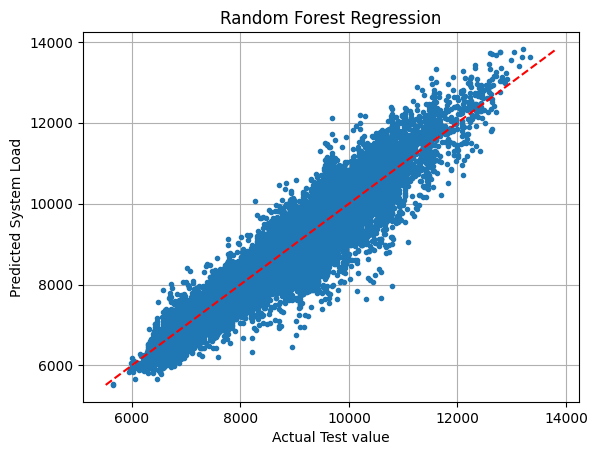

In [9]:
# Creating a Random Forest Regression Model and Fitting it to the Training Data
regr = RandomForestRegressor(n_estimators=20,max_depth=10,min_samples_split=5,min_samples_leaf=5,max_features= None )
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

# performance metrics
R2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("The Model performance parameter with default Hyperparameter in RF algorithm:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2_score:", R2_score)


plt.plot(y_pred,y_test, '.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.title('Random Forest Regression')
plt.xlabel('Actual Test value')
plt.ylabel('Predicted System Load')
plt.grid(True)
plt.show()

Function definition for Random Forest Algorithm

In [10]:
def RandomForestRegressor_hpo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    # Creating a Random Forest Regression Model and Fitting it to the Training Data
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features= max_features)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("R2_Score:", score)
    return y_pred

Hyperparameter optimization using Randomized Search

In [11]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': (10, 200),'max_depth': (1, 30),'min_samples_split': (2, 10),'min_samples_leaf': (1, 4),'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestRegressor()
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1)

# Perform the search
random_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)


c:\Users\shumagai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\shumagai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shumagai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best Negative Mean Squared Error: -107565.69630877739


Assign best parameters to variables so that they could be used to run RF regression model

In [12]:
best_n_estimators = best_params[ 'n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_max_features = best_params['max_features']

The Model performance parameter after HPO using Random Search in RF algorithm:
Mean Squared Error: 94267.17049544107
Mean Absolute Error: 226.52003848719795
r2_score: 0.9531368071234744


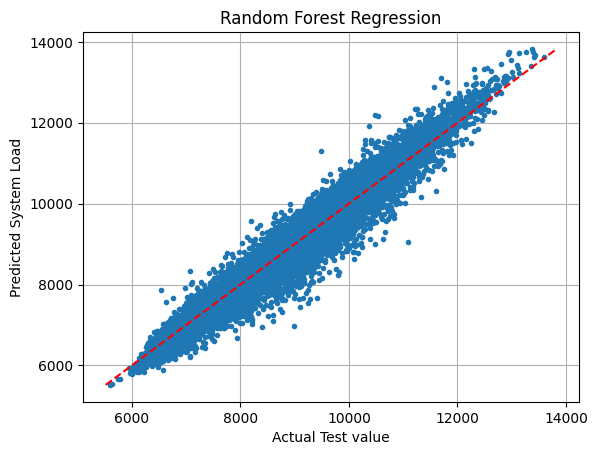

In [13]:
# function call to run the model on 
y_pred = RandomForestRegressor_hpo(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, best_max_features)

R2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("The Model performance parameter after HPO using Random Search in RF algorithm:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2_score:", R2_score)

plt.plot(y_pred,y_test, '.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.title('Random Forest Regression')
plt.xlabel('Actual Test value')
plt.ylabel('Predicted System Load')
plt.grid(True)
plt.show()

Lets use the Bayesian Optimization technique for Random Forest Regression problem

In [14]:
from bayes_opt import BayesianOptimization
# Define a mapping from integer index to max_features value

# def RandomForestRegressor_Bhpo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
#     # Creating a Random Forest Regression Model and Fitting it to the Training Data
#     regr = RandomForestRegressor(n_estimators=int(n_estimators),max_depth=int(max_depth),min_samples_split=int(min_samples_split),
#                                  min_samples_leaf=int(min_samples_leaf))
#     regr.fit(x_train,y_train)
#     y_pred = regr.predict(x_test)
#     score = r2_score(y_test, y_pred)

#     # Evaluate the model on the test set
#     mse = mean_squared_error(y_test, y_pred)
#     return -mse

# Define the search space for hyperparameters
# pbounds = {'n_estimators': (10, 50, 100, 200), 'max_depth': (None, 10, 20, 30), 'min_samples_split': (2, 5, 10),
#     'min_samples_leaf': (1, 2, 4), 'max_features': ('sqrt', 'log2', None), 'bootstrap': (True, False)}

pbounds = {'n_estimators': (10, 200), 'max_depth': (1, 30), 'min_samples_split': (2, 10),'max_features':  ('sqrt', 'log2', None),'min_samples_leaf': (1, 4)}
# max_features_options = {'sqrt', 'log2'}

# # Initialize BayesianOptimization
# optimizer = BayesianOptimization(
#     f=RandomForestRegressor_Bhpo,
#     pbounds=pbounds,
#     random_state=42,
# )


rf_model = RandomForestRegressor()

optimizer = BayesSearchCV(
    estimator=rf_model,
    search_spaces=pbounds,
    n_iter=100,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Perform optimization
optimizer.fit(x_train, y_train)

# Get the best hyperparameters
best_params = optimizer.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_max_features = best_params['max_features']

best_mse = RandomForestRegressor_hpo(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf,best_max_features)
print("Best Mean Squared Error:", -best_mse)  # Convert back to positive MSE
#r2_score(y_test, y_pred)

Best Hyperparameters: OrderedDict({'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 173})
Best Mean Squared Error: [-8088.01080925 -9283.73456526 -8070.15184971 ... -6413.66621293
 -8216.48144509 -9799.79179179]


In [15]:
# def RF_Bhpo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
#     # Creating a Random Forest Regression Model and Fitting it to the Training Data
#     regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
#     regr.fit(x_train,y_train)
#     y_pred = regr.predict(x_test)
#     score = r2_score(y_test, y_pred)
#     #print("R2_Score:", score)
#     return score, y_pred

The Model performance parameter after HPO using Bayesian Optimization in RF algorithm:
Mean Squared Error: 95619.61246981322
Mean Absolute Error: 228.1353760104747
r2_score: 0.9524644654294763


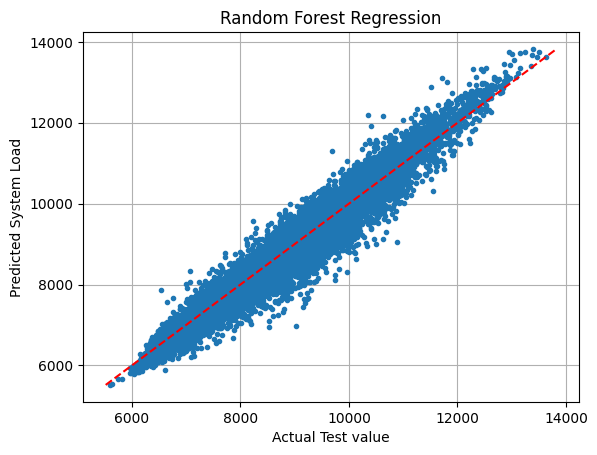

In [16]:
y_pred = RandomForestRegressor_hpo(int(best_n_estimators), int(best_max_depth), int(best_min_samples_split), int(best_min_samples_leaf),best_max_features)

R2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("The Model performance parameter after HPO using Bayesian Optimization in RF algorithm:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2_score:", R2_score)

plt.plot(y_pred,y_test, '.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.title('Random Forest Regression')
plt.xlabel('Actual Test value')
plt.ylabel('Predicted System Load')
plt.grid(True)
plt.show()